<a href="https://colab.research.google.com/github/2303A52058/STAT-ML-39/blob/main/SML_A12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**NAME: G. MEGHA AKANKSHA**

**HT NO: 2303A52058**

**BATCH-39**

Model Accuracies:
SVM: 0.81
KNN: 0.76
Logistic Regression: 0.81


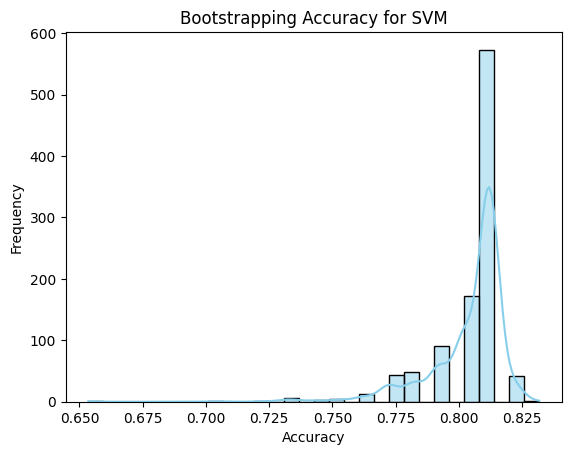

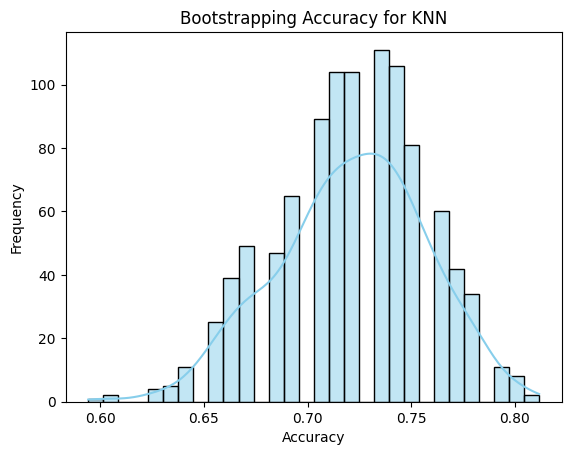

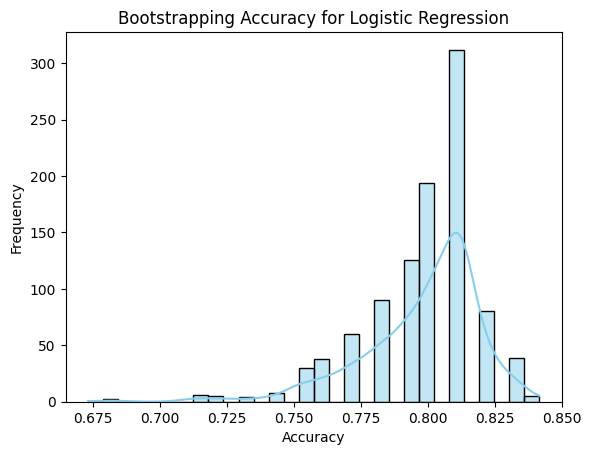

In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample

# Load the dataset
file_path = 'breast_cancer_survival.csv'  # Replace with your local file path
data = pd.read_csv(file_path)

# Impute missing values in target variable 'Patient_Status'
imputer = SimpleImputer(strategy='most_frequent')
# The input to fit_transform should be 1D for 'most_frequent' strategy
data['Patient_Status'] = imputer.fit_transform(data['Patient_Status'].values.reshape(-1, 1))[:, 0]
# Extracting the first (and only) column from the output of fit_transform to make it 1D
# Encode categorical variables
categorical_features = ['Gender', 'Tumour_Stage', 'Histology', 'ER status',
                        'PR status', 'HER2 status', 'Surgery_type']
label_encoders = {col: LabelEncoder() for col in categorical_features}
for col in categorical_features:
    data[col] = label_encoders[col].fit_transform(data[col])

# Encode target variable
target_encoder = LabelEncoder()
data['Patient_Status'] = target_encoder.fit_transform(data['Patient_Status'])

# Select features and target
features = ['Age', 'Protein1', 'Protein2', 'Protein3', 'Protein4'] + categorical_features
X = data[features]
y = data['Patient_Status']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize models
models = {
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Logistic Regression': LogisticRegression(random_state=42)
}

# Train models and calculate accuracy
accuracies = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracies[model_name] = accuracy_score(y_test, y_pred)

# Print model accuracies
print("Model Accuracies:")
for model_name, accuracy in accuracies.items():
    print(f"{model_name}: {accuracy:.2f}")

# Function to perform bootstrapping and plot results
def bootstrap_plot(model, model_name, X_train, y_train, X_test, y_test, n_iterations=1000):
    bootstrapped_accuracies = []

    for _ in range(n_iterations):
        # Resample training data with replacement
        X_resample, y_resample = resample(X_train, y_train)
        model.fit(X_resample, y_resample)
        y_pred = model.predict(X_test)
        bootstrapped_accuracies.append(accuracy_score(y_test, y_pred))

    # Plot
    sns.histplot(bootstrapped_accuracies, kde=True, bins=30, color='skyblue')
    plt.title(f'Bootstrapping Accuracy for {model_name}')
    plt.xlabel('Accuracy')
    plt.ylabel('Frequency')
    plt.show()

# Generate plots for each model
for model_name, model in models.items():
    bootstrap_plot(model, model_name, X_train, y_train, X_test, y_test)
